# Milestone 1 - Phase 2
Muhammad Ikhsan Rahman Hakim - FTDS001


## Telco Customer Churn - Focused customer retention programs

### Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."

### Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents


[Link to dataset](https://www.kaggle.com/blastchar/telco-customer-churn)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import f1_score, roc_curve, auc, classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# oversampling
from imblearn.over_sampling import SMOTE

%matplotlib inline

# Data Loading

In [4]:
# we can see all the columns
pd.set_option('display.max_columns', 100)

# to make this notebook's output stable across runs
np.random.seed(42)

In [5]:
rawdf = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Dataset Exploration

In [6]:
rawdf.shape

(7043, 21)

In [7]:
rawdf.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
rawdf.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


# Data Cleaning 

In [10]:
rawdf.isnull().sum().any()

False

In [11]:
rawdf.duplicated().any()

False

Tidak ditemukan data yang kosong ataupun terduplikasi.

In [12]:
rawdf[rawdf['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
rawdf.drop(rawdf[rawdf['TotalCharges'] == ' '].index, inplace = True)

Saya menemukan data kosong ini ketika ingin mengubah tipe data TotalCharge menjadi float64. So, i'll just drop it from the dataset.

#### Change datatype

In [14]:
#change datatype 'TotalCharges' to float64
rawdf['TotalCharges'] = rawdf['TotalCharges'].astype('float64')

In [15]:
# we dont need this column
newdf = rawdf.drop(columns = ['customerID'])

# EDA

In [16]:
# set plot style for EDA
plt.style.use('fivethirtyeight')

In [17]:
# for numerical and categorical columns
num_column = list(newdf.select_dtypes("number").columns)
cat_column = list(newdf.select_dtypes(object).drop(columns = ["Churn"]).columns)

In [18]:
newdf[cat_column].describe().T

,count,unique,top,freq
gender,7032,2,Male,3549
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094
TechSupport,7032,3,No,3472


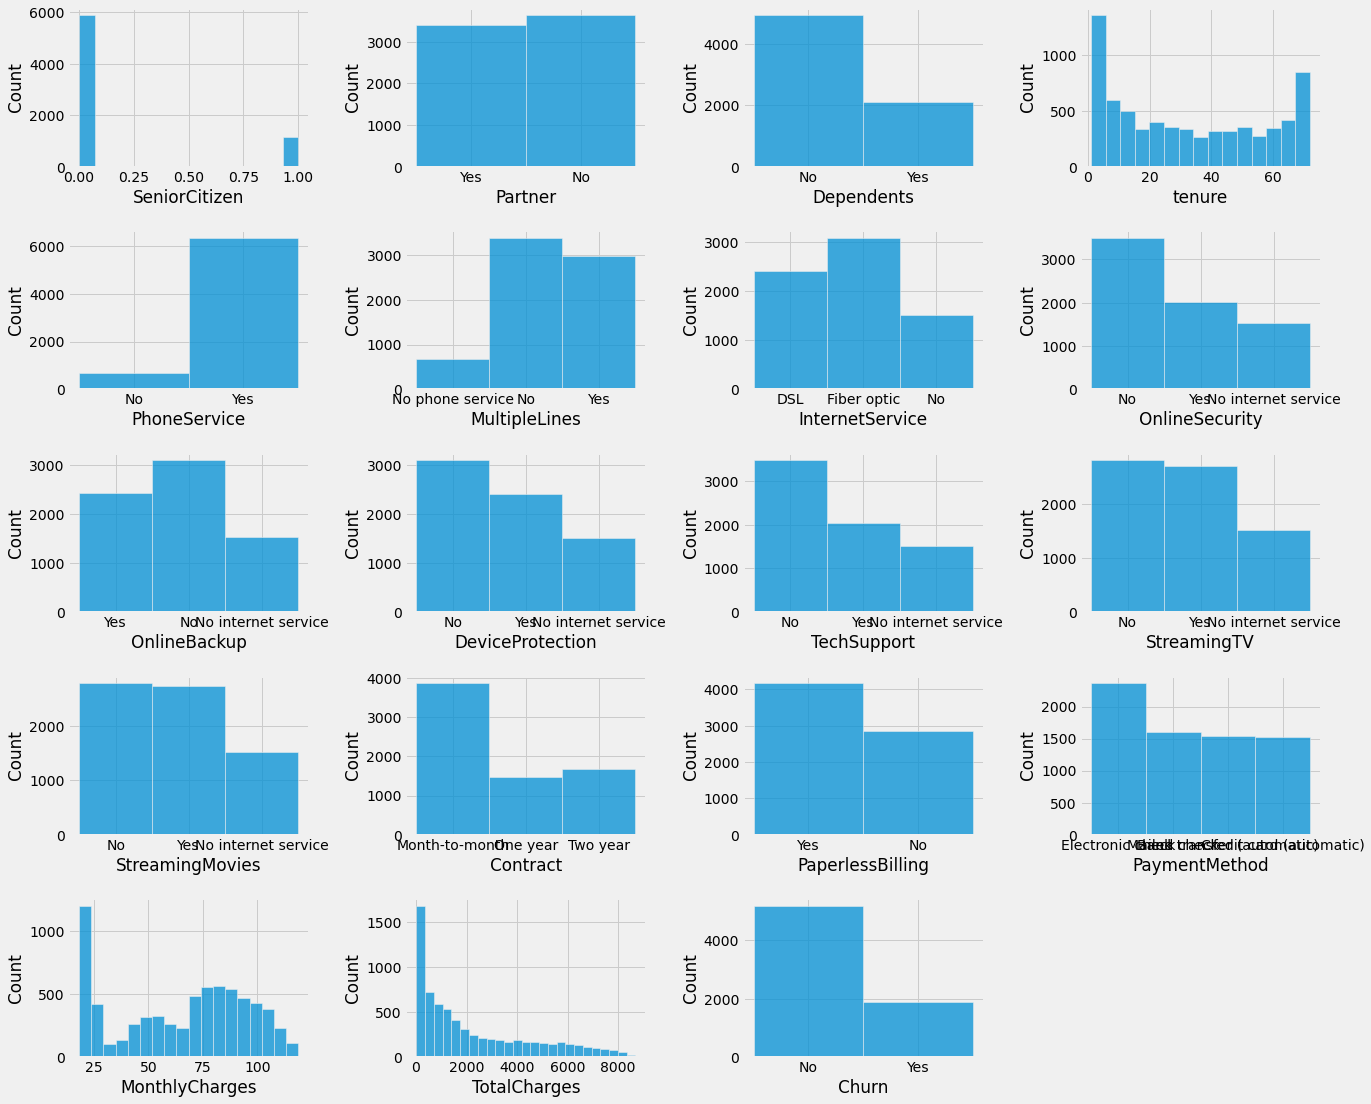

In [19]:
fig = plt.figure(figsize=(20, 18))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, len(newdf.columns)):
    ax = fig.add_subplot(5, 4, i)
    #ax.hist(newdf[newdf.columns[i]])
    sns.histplot(newdf[newdf.columns[i]])
    plt.xlabel(newdf.columns[i])

Dari plot di atas, kita dapat melihat distribusi dataset secara keseluruhan. Untuk data numerik, rata-rata berbentuk bimodal dan multimodal distribution. Hanya kolom 'Total Charges' saja yang *skewed* ke kanan, hal ini wajar karena ada saja customer yang memiliki total tagihan yang tinggi dikarenakan jumlah service yang dipakai cukup banyak atau hal lainnya.

Dan terlihat pula bahwa kolom target dataset ini (Churn) memiliki data yang tidak seimbang.

In [20]:
newdf.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

Coba kita group dataset ini berdasarkan kolom Churn dengan kategori "Yes"

In [21]:
cekdf = newdf[newdf['Churn']=='Yes']
cekdf.shape

(1869, 20)

In [22]:
check = cekdf.columns
for column in check:
    print([column],'\n', cekdf[column].value_counts(),'\n')

['gender'] 
 Female    939
Male      930
Name: gender, dtype: int64 

['SeniorCitizen'] 
 0    1393
1     476
Name: SeniorCitizen, dtype: int64 

['Partner'] 
 No     1200
Yes     669
Name: Partner, dtype: int64 

['Dependents'] 
 No     1543
Yes     326
Name: Dependents, dtype: int64 

['tenure'] 
 1     380
2     123
3      94
4      83
5      64
     ... 
71      6
72      6
62      5
63      4
64      4
Name: tenure, Length: 72, dtype: int64 

['PhoneService'] 
 Yes    1699
No      170
Name: PhoneService, dtype: int64 

['MultipleLines'] 
 Yes                 850
No                  849
No phone service    170
Name: MultipleLines, dtype: int64 

['InternetService'] 
 Fiber optic    1297
DSL             459
No              113
Name: InternetService, dtype: int64 

['OnlineSecurity'] 
 No                     1461
Yes                     295
No internet service     113
Name: OnlineSecurity, dtype: int64 

['OnlineBackup'] 
 No                     1233
Yes                     523
No in

Dari slicing data di atas, saya ingin mengetahui apa saja kriteria customer yang memutuskan untuk tidak lagi berlangganan (*Churning customer*)

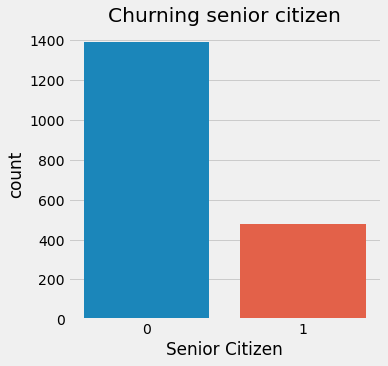

In [23]:
plt.figure(figsize=(5,5))
sns.countplot(x=cekdf['SeniorCitizen'], data=cekdf)
plt.title('Churning senior citizen')

plt.xlabel('Senior Citizen')
plt.show()

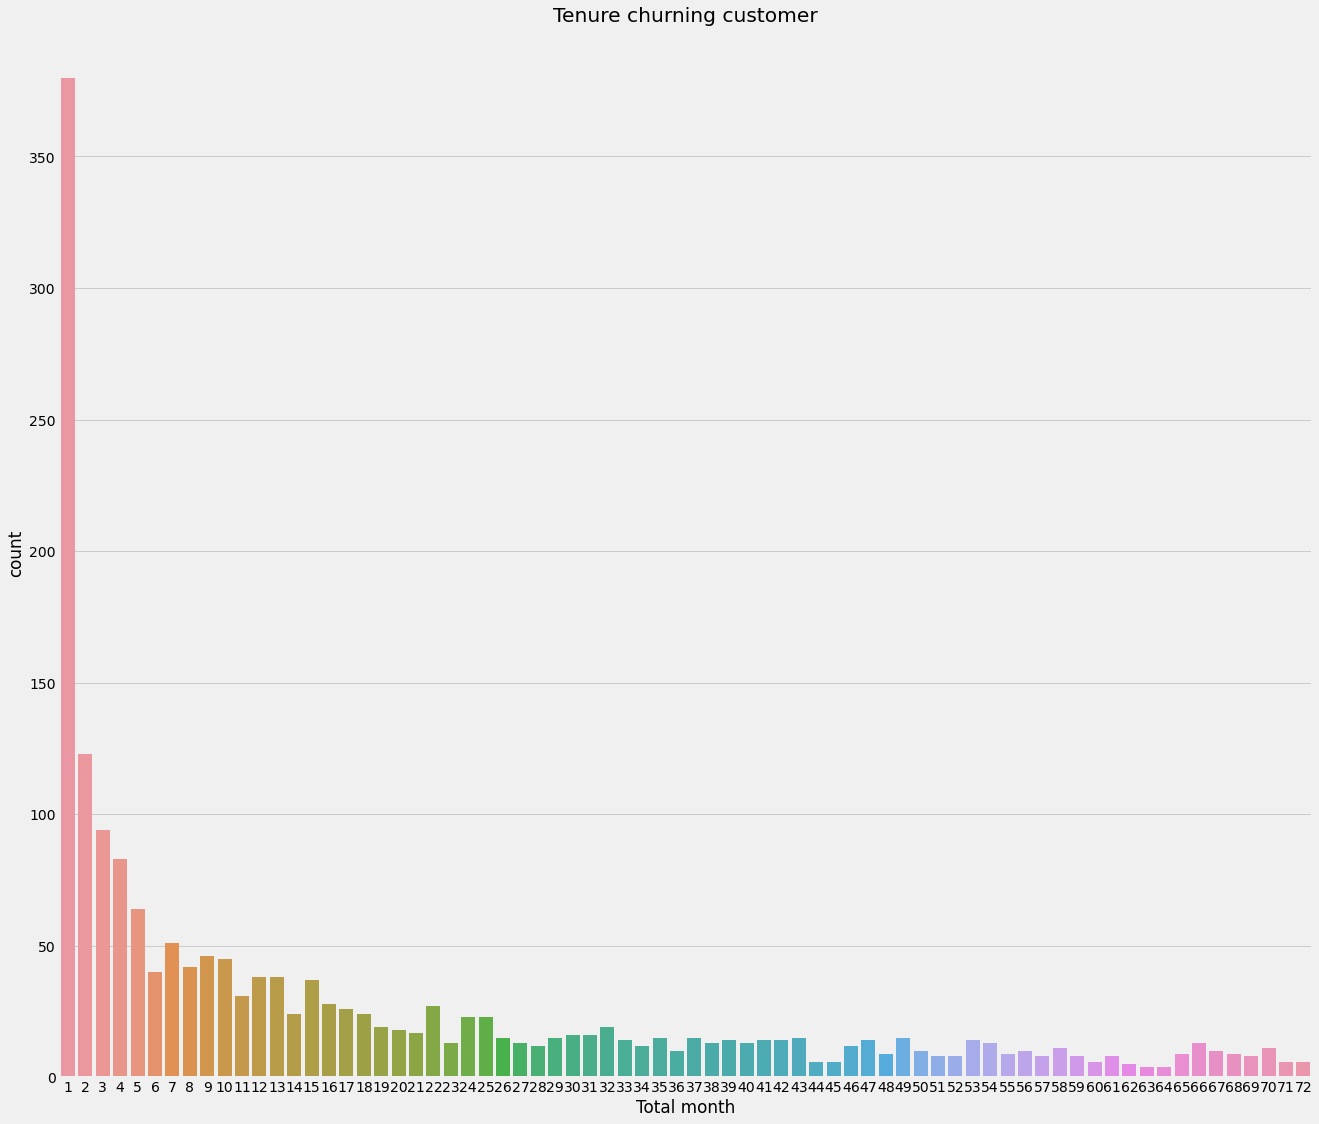

In [24]:
plt.figure(figsize=(20,18))
sns.countplot(x=cekdf['tenure'], data=cekdf)
plt.title('Tenure churning customer')

plt.xlabel('Total month')
plt.show()

Di sini dapat terlihat bahwa mayoritas *churning customer* adalah 'Non senior citizen' atau masyarakat dengan umur dibawah 40. Dan mayoritas hanya menggunakan layanan selama 1 bulan.

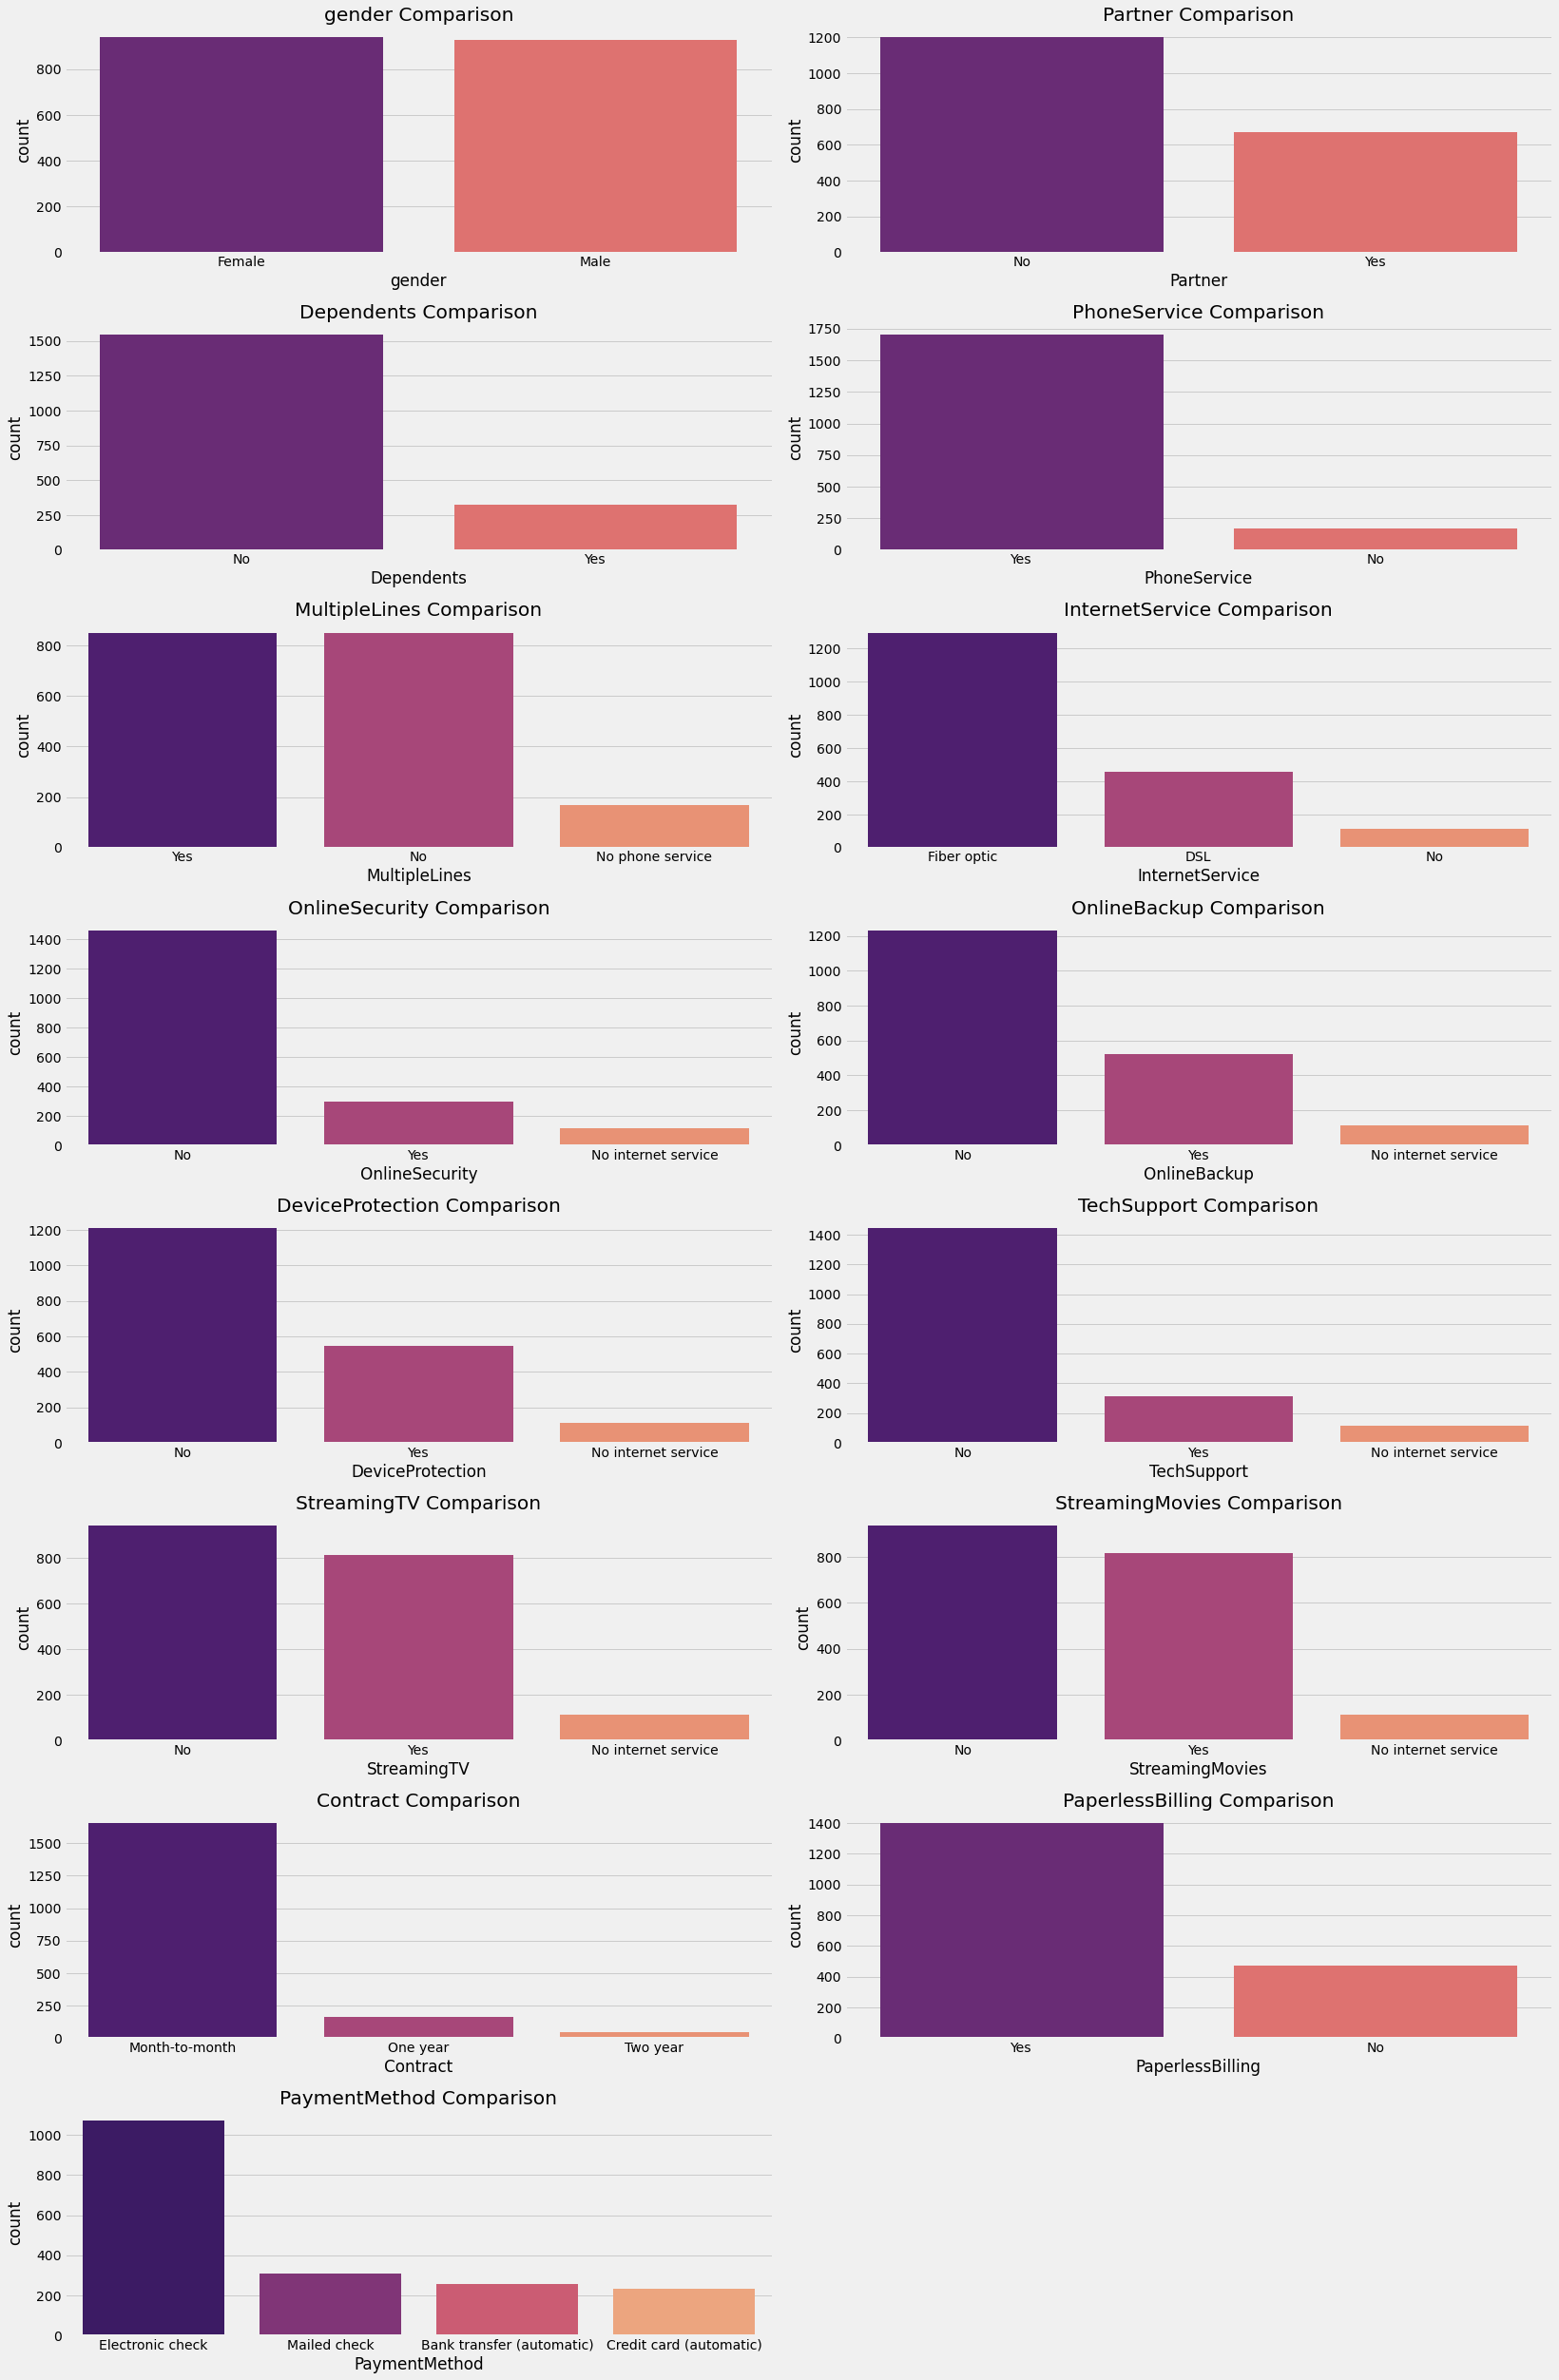

In [25]:
plt.figure(figsize = (23, 35))
for i in range(len(cat_column)):
    plt.subplot(len(cat_column)//2+1, 2, i + 1)
    sns.countplot(
        x = cekdf[cat_column[i]],
        order = cekdf[cat_column[i]].value_counts().sort_values(ascending = False).index,
        palette = "magma"
    )
    plt.title(str(cat_column[i]) + " Comparison", fontweight = 20)

plt.tight_layout()
plt.show()

#### *Let me summarize plot above and a plot before*

Setelah dipisahkan berdasarkan kolom "Churn" dengan kategori "Yes", rata-rata customer kategori tersebut adalah masyarakat non-senior (dengan asumsi dibawah 40 tahun) dengan service yang digunakan hanya Phone, Internet service dan Streaming TV and movies dengan metode pembayaran elektronik.

Berdasarkan hal-hal di atas dapat diasumsikan bahwa customer kategori ini adalah customer yang hanya ingin coba-coba layanan saja dari perusahaan Telco ini, karena jika dilihat dari tenure pun, mayoritas pemakaian hanya 1 bulan dengan mengambil jangka waktu langganan perbulan (month-to-month).


# Data Preprocessing

## Features Encoding

In [26]:
# gender
Gender_dummies = pd.get_dummies(newdf['gender'], prefix = 'Gender')
newdf = pd.concat([newdf, Gender_dummies], axis = 1)

# partner
Partner_dummies = pd.get_dummies(newdf['Partner'], prefix = 'Partner')
newdf = pd.concat([newdf, Partner_dummies], axis = 1)

# Dependents
Dependents_dummies = pd.get_dummies(newdf['Dependents'], prefix = 'Dependents')
newdf = pd.concat([newdf, Dependents_dummies], axis = 1)

# PhoneService
PhoneService_dummies = pd.get_dummies(newdf['PhoneService'], prefix = 'PhoneService')
newdf = pd.concat([newdf, PhoneService_dummies], axis = 1)

# MultipleLines
MultipleLines_dummies = pd.get_dummies(newdf['MultipleLines'], prefix = 'MultipleLines')
newdf = pd.concat([newdf, MultipleLines_dummies], axis = 1)

# InternetService
InternetService_dummies = pd.get_dummies(newdf['InternetService'], prefix = 'InternetService')
newdf = pd.concat([newdf, InternetService_dummies], axis = 1)

# OnlineSecurity
OnlineSecurity_dummies = pd.get_dummies(newdf['OnlineSecurity'], prefix = 'OnlineSecurity')
newdf = pd.concat([newdf, OnlineSecurity_dummies], axis = 1)

# OnlineBackup
OnlineBackup_dummies = pd.get_dummies(newdf['OnlineSecurity'], prefix = 'OnlineSecurity')
newdf = pd.concat([newdf, OnlineBackup_dummies], axis = 1)

# DeviceProtection
DeviceProtection_dummies = pd.get_dummies(newdf['DeviceProtection'], prefix = 'DeviceProtection')
newdf = pd.concat([newdf, DeviceProtection_dummies], axis = 1)

# TechSupport
TechSupport_dummies = pd.get_dummies(newdf['TechSupport'], prefix = 'TechSupport')
newdf = pd.concat([newdf, TechSupport_dummies], axis = 1)

# StreamingTV
StreamingTV_dummies = pd.get_dummies(newdf['StreamingTV'], prefix = 'StreamingTV')
newdf = pd.concat([newdf, StreamingTV_dummies], axis = 1)

# StreamingMovies
StreamingMovies_dummies = pd.get_dummies(newdf['StreamingMovies'], prefix = 'StreamingMovies')
newdf = pd.concat([newdf, StreamingMovies_dummies], axis = 1)

# Contract
Contract_dummies = pd.get_dummies(newdf['Contract'], prefix = 'Contract')
newdf = pd.concat([newdf, Contract_dummies], axis = 1)

# PaperlessBilling
PaperlessBilling_dummies = pd.get_dummies(newdf['PaperlessBilling'], prefix = 'PaperlessBilling')
newdf = pd.concat([newdf, PaperlessBilling_dummies], axis = 1)

# PaymentMethod
PaymentMethod_dummies = pd.get_dummies(newdf['PaymentMethod'], prefix = 'PaymentMethod')
newdf = pd.concat([newdf, PaymentMethod_dummies], axis = 1)

## Target Encoding 

In [27]:
le = LabelEncoder()
newdf['Churn'] = le.fit_transform(newdf['Churn'])

In [28]:
newdf.drop(columns = cat_column, inplace = True)

In [29]:
newdf.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [30]:
newdf.shape

(7032, 46)

## Split dataset to features (X) dan target (y)

In [31]:
X = newdf.drop(columns = ["Churn"])
y = newdf["Churn"]

## Split dataset

In [32]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

In [33]:
X_train_full.shape

(4922, 45)

In [34]:
y_train_full.shape

(4922,)

In [35]:
y_train_full.value_counts()

0    3614
1    1308
Name: Churn, dtype: int64

In [36]:
3614-1308

2306

## Scalling with pipeline

In [37]:
# using pipeline
scaler_pipeline = Pipeline([('minmax_scaler', MinMaxScaler())])

In [38]:
scaler_pipeline.fit(X_train_full)

X_train_full = scaler_pipeline.transform(X_train_full)
X_test_trf = scaler_pipeline.transform(X_test)

## Use SMOTE to upsampling training set

In [39]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train_full, y_train_full = oversample.fit_resample(X_train_full, y_train_full)

In [40]:
print(X_train_full.shape)
print(y_train_full.shape)
print(y_train_full.value_counts())

(7228, 45)
(7228,)
0    3614
1    3614
Name: Churn, dtype: int64


In [41]:
7228-4922

2306

## Split Dataset again to get X_train and X_val

In [42]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size = 0.3, random_state = 42)

In [43]:
X_train.shape, X_train.shape[1:]

((5059, 45), (45,))

# Define Model
## ANN Sequential

In [42]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [43]:
# Base hyperparameters
model = keras.models.Sequential([
    keras.layers.Dense(45, input_shape=(45,)),
    
    keras.layers.Dense(30, kernel_initializer='glorot_uniform'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    
    keras.layers.Dense(20, kernel_initializer='glorot_uniform'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    
    keras.layers.Dense(10, kernel_initializer='glorot_uniform'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    
    keras.layers.Dense(1, activation="sigmoid")
])

Disini saya membuat model ANN sequential dengan:
- 1 input layer
- 3 hidden layer (dengan masing neuron 30,20 dan 10), initializer = glorot_uniform, activation = relu.
    Activation yang dipakai relu, karena berdasarkan yang saya ketahui untuk base model coba menggunakan relu terlebih dahulu,
    baru dicoba gunakan activation yang lain (harus di state di awal, karena defaultnya adalah None).
- 1 output layer, dengan 1 neuron dan activation = sigmoid. Karena sigmoid nilainya dari 0-1 dan target dataset ini adalah klasifikasi binary.
- Saya juga menambahkan batchnormalization di sini, dengan harapan proses training data lebih cepat. Dari beberapa artikel menyebutkan bahwa proses ini untuk menstandarisasi input ke network, bahkan dalam beberapa kasus dapat mempercepat training data dan mengurangi generalization error. 

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                1840      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1230      
_________________________________________________________________
batch_normalization (BatchNo (None, 30)                120       
_________________________________________________________________
activation (Activation)      (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                620       
_________________________________________________________________
batch_normalization_1 (Batch (None, 20)                80        
_________________________________________________________________
activation_1 (Activation)    (None, 20)                0

In [45]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [46]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
159/159 [==============================] - 3s 10ms/step - loss: 0.5422 - accuracy: 0.7387 - val_loss: 0.5145 - val_accuracy: 0.7607
Epoch 2/50
159/159 [==============================] - 2s 10ms/step - loss: 0.4707 - accuracy: 0.7778 - val_loss: 0.4922 - val_accuracy: 0.7561
Epoch 3/50
159/159 [==============================] - 1s 9ms/step - loss: 0.4516 - accuracy: 0.7899 - val_loss: 0.4807 - val_accuracy: 0.7690
Epoch 4/50
159/159 [==============================] - 2s 10ms/step - loss: 0.4446 - accuracy: 0.7954 - val_loss: 0.4790 - val_accuracy: 0.7653
Epoch 5/50
159/159 [==============================] - 2s 9ms/step - loss: 0.4387 - accuracy: 0.7976 - val_loss: 0.4771 - val_accuracy: 0.7713
Epoch 6/50
159/159 [==============================] - 1s 9ms/step - loss: 0.4313 - accuracy: 0.7964 - val_loss: 0.4720 - val_accuracy: 0.7722
Epoch 7/50
159/159 [==============================] - 2s 11ms/step - loss: 0.4247 - accuracy: 0.7970 - val_loss: 0.4755 - val_accuracy: 0.7709
Ep

#### Plot history

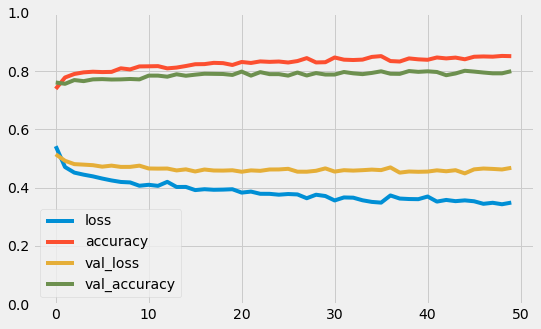

In [47]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

Dari 50x epoch model, dapat terlihat bahwa akurasi training set model semakin naik seiring berjalannya epoch. Akurasi dari validation set pun juga semakin naik seiring waktu walaupun tidak begitu sama persis dengan training set.

Untuk loss training set sendiri semakin turun seiring berjalannya waktu, sementara loss validation set juga ikut turun namun sedikit demi sedikit dan terlihat tidak begitu signifikan dibandingkan dengan training set. Kemungkinan jika epoch ditambah, kemungkinan gap yang ada semakin bertambah.

Namun dari Base model ini, dirasa sudah cukup baik karena gap kedua set ini (baik loss dan akurasi) tidak begitu jauh.

In [48]:
model.evaluate(X_test, y_test)

66/66 [==============================] - 0s 3ms/step - loss: 814.5181 - accuracy: 0.7341


[814.51806640625, 0.7341232299804688]

### Model Inference

In [49]:
y_pred = model.predict(X_test_trf)
print('Predict result: \n', y_pred[:5])
print('\n y_test: \n', y_test[:5])

Predict result: 
 [[0.11243299]
 [0.532248  ]
 [0.07047126]
 [0.06824629]
 [0.03783372]]

 y_test: 
 4221    0
1820    0
2375    0
5462    0
1791    0
Name: Churn, dtype: int32


In [50]:
predictions = []
for element in y_pred:
    if element > 0.5:
        predictions.append(1)
    else:
        predictions.append(0)

print(predictions[:5])

[0, 1, 0, 0, 0]


In [51]:
#insert predict result to dataframe
pred_result_log = pd.DataFrame({
    "Actual Target":y_test,
    "Prediction":predictions
})
pred_result_log.head(5)

,Actual Target,Prediction
4221,0,0
1820,0,1
2375,0,0
5462,0,0
1791,0,0


In [52]:
pred_result_log['Prediction'].value_counts()

0    1335
1     775
Name: Prediction, dtype: int64

### Evaluation

In [53]:
print(f"ACCURACY SCORE:\n{accuracy_score(y_test, predictions):.4f}")
print(f"F1 SCORE:\n{f1_score(y_test, predictions)}")
print(f"ROC_AUC SCORE:\n{roc_auc_score(y_test, predictions)}\n")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, predictions)}")

ACCURACY SCORE:
0.7327
F1 SCORE:
0.5778443113772456
ROC_AUC SCORE:
0.7184636399310004

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.87      0.75      0.80      1549
           1       0.50      0.69      0.58       561

    accuracy                           0.73      2110
   macro avg       0.68      0.72      0.69      2110
weighted avg       0.77      0.73      0.74      2110



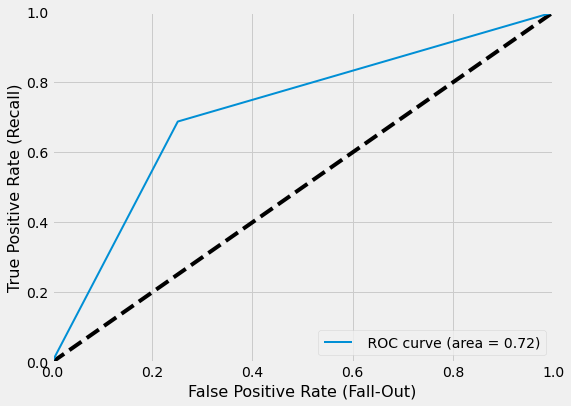

In [54]:
plt.figure(figsize=(8, 6))                                   
plt.axis([0, 1, 0, 1])                                    
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
plt.grid(True)                                            
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal

# y_scores = model.decision_function(X_test_trf) # error if including this row
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, linewidth=2,label=' ROC curve (area = %0.2f)' % roc_auc)

plt.legend(loc="lower right")

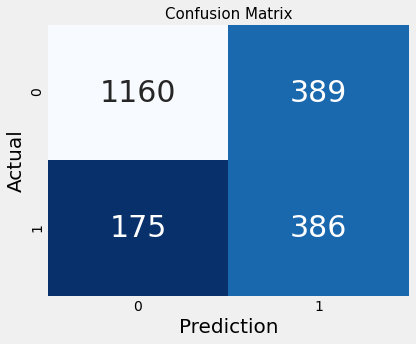

In [55]:
plt.figure(figsize = (6, 5))
sns.heatmap(
        confusion_matrix(y_test, predictions),
        annot = True,
        fmt = '.0f',
        cmap = 'Blues_r', cbar=False,
        annot_kws={"fontsize":30}
    )
plt.xlabel("Prediction", fontsize = 20)
plt.ylabel("Actual", fontsize = 20)
plt.title("Confusion Matrix", fontsize = 15)

plt.tight_layout()
plt.show()

Dari hasil Classification Report, nilai akurasi yang didapat adalah 0.73 dan ROC_AUC score = 0.72, nilai ini dirasa cukup bagus untuk base score. Namun jika dilihat dari Confusion Matrix dan precision recallnya terhadap 1 (Churn = "Yes"), hasil yang didapat tidak bagus. Nilai F1 scorenya pun begitu rendah. Model hanya mampu memprediksi customer yang tetap berlangganan saja.

Model dirasa belum mampu memprediksi apakah customer akan *churn* atau berhenti berlangganan atau tidak. Disini penulis mengharapkan keseimbangan yang rendah antara False Poitive dan False Positive (nilai F1 Score yang tinggi) agar perusahaan bisa berfokus pada pelanggan yang benar-benar terindikasi akan berhenti berlangganan (churning), dan tidak menghabiskan cost pada target yang salah.


### Model Improvement (Hyperparameter Tuning)

In [78]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [79]:
def build_model(n_hidden=2, n_neurons=40, input_shape=[45]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.Adam()
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

In [80]:
model_cv = keras.wrappers.scikit_learn.KerasClassifier(build_model)

In [81]:
model_cv.fit(X_train, y_train, epochs=100,
             validation_data=(X_val, y_val),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
159/159 [==============================] - 1s 5ms/step - loss: 1.0332 - accuracy: 0.6482 - val_loss: 0.6131 - val_accuracy: 0.7441
Epoch 2/100
159/159 [==============================] - 1s 5ms/step - loss: 0.6014 - accuracy: 0.7385 - val_loss: 0.5881 - val_accuracy: 0.7598
Epoch 3/100
159/159 [==============================] - 1s 5ms/step - loss: 0.5829 - accuracy: 0.7490 - val_loss: 1.2586 - val_accuracy: 0.5021
Epoch 4/100
159/159 [==============================] - 1s 5ms/step - loss: 0.5963 - accuracy: 0.7013 - val_loss: 0.5226 - val_accuracy: 0.7570
Epoch 5/100
159/159 [==============================] - 1s 5ms/step - loss: 0.5008 - accuracy: 0.7780 - val_loss: 0.5358 - val_accuracy: 0.7441
Epoch 6/100
159/159 [==============================] - 1s 5ms/step - loss: 0.4882 - accuracy: 0.7810 - val_loss: 0.5011 - val_accuracy: 0.7630
Epoch 7/100
159/159 [==============================] - 1s 4ms/step - loss: 0.4677 - accuracy: 0.7875 - val_loss: 0.5130 - val_accuracy: 0.7653

In [82]:
param_distribs = {
    "n_hidden": [2, 3, 4],
    "n_neurons": [40, 30, 20]
}

grid_cv = GridSearchCV(model_cv, param_distribs, cv=5, verbose=2, n_jobs=-1)
grid_cv.fit(X_train, y_train, epochs=100,
            validation_data=(X_val, y_val),
            callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 5 folds for each of 9 candidates, totalling 45 fits


C:\Users\mistersunday\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/100
159/159 [==============================] - 2s 7ms/step - loss: 0.8032 - accuracy: 0.7102 - val_loss: 0.4994 - val_accuracy: 0.7630
Epoch 2/100
159/159 [==============================] - 1s 5ms/step - loss: 0.5018 - accuracy: 0.7699 - val_loss: 0.4989 - val_accuracy: 0.7695
Epoch 3/100
159/159 [==============================] - 1s 5ms/step - loss: 0.4750 - accuracy: 0.7804 - val_loss: 0.4870 - val_accuracy: 0.7658
Epoch 4/100
159/159 [==============================] - 1s 5ms/step - loss: 0.4536 - accuracy: 0.7820 - val_loss: 0.5017 - val_accuracy: 0.7727
Epoch 5/100
159/159 [==============================] - 1s 5ms/step - loss: 0.4484 - accuracy: 0.7887 - val_loss: 0.5066 - val_accuracy: 0.7681
Epoch 6/100
159/159 [==============================] - 1s 5ms/step - loss: 0.4460 - accuracy: 0.7923 - val_loss: 0.4830 - val_accuracy: 0.7681
Epoch 7/100
159/159 [==============================] - 1s 5ms/step - loss: 0.4447 - accuracy: 0.8015 - val_loss: 0.4956 - val_accuracy: 0.7695

GridSearchCV(cv=5,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001E5DF086B20>,
             n_jobs=-1,
             param_grid={'n_hidden': [2, 3, 4], 'n_neurons': [40, 30, 20]},
             verbose=2)

In [106]:
print('Grid Search Best score', grid_cv.best_score_)
print('Grid Search Best Parameters', grid_cv.best_params_)

Grid Search Best score 0.7831619024276734
Grid Search Best Parameters {'n_hidden': 3, 'n_neurons': 30}


In [98]:
grid_cv.score(X_test, y_test)

66/66 [==============================] - 0s 3ms/step - loss: 4.1011 - accuracy: 0.7341


0.7341232299804688

In [88]:
grid_cv.best_estimator_

In [89]:
# Hasil evaluasi model dari gridCV
model_gridCV = grid_cv.best_estimator_.model

model_gridCV.evaluate(X_test, y_test)

66/66 [==============================] - 0s 3ms/step - loss: 4.1011 - accuracy: 0.7341


[4.101136207580566, 0.7341232299804688]

### Model Inference (Hasil GridSearchCV)

In [93]:
pred_grid = model_gridCV.predict(X_test_trf)
print('Predict result: \n', pred_grid[:5])
print('\n y_test: \n', y_test[:5])

predict_grid = []
for element in pred_grid:
    if element > 0.5:
        predict_grid.append(1)
    else:
        predict_grid.append(0)

print('\n',predict_grid[:5])

Predict result: 
 [[0.26827738]
 [0.493408  ]
 [0.14418449]
 [0.15632325]
 [0.05079332]]

 y_test: 
 4221    0
1820    0
2375    0
5462    0
1791    0
Name: Churn, dtype: int32

 [0, 0, 0, 0, 0]


### Evaluation (Hasil GridSearchCV)

In [94]:
print(f"ACCURACY SCORE:\n{accuracy_score(y_test, predict_grid):.4f}")
print(f"F1 SCORE:\n{f1_score(y_test, predict_grid)}")
print(f"ROC_AUC SCORE:\n{roc_auc_score(y_test, predict_grid)}\n")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, predict_grid)}")

ACCURACY SCORE:
0.7341
F1 SCORE:
0.6024096385542169
ROC_AUC SCORE:
0.7416025979615393

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1549
           1       0.50      0.76      0.60       561

    accuracy                           0.73      2110
   macro avg       0.70      0.74      0.70      2110
weighted avg       0.79      0.73      0.75      2110



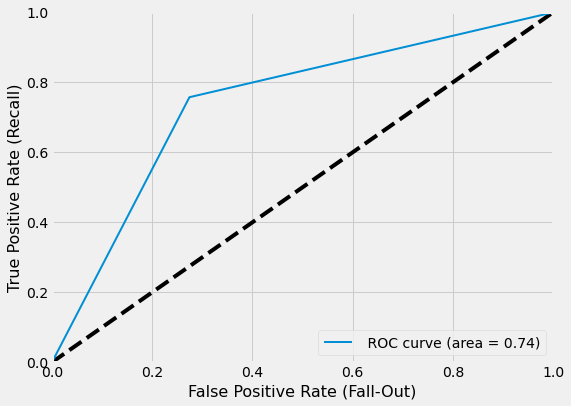

In [95]:
plt.figure(figsize=(8, 6))                                   
plt.axis([0, 1, 0, 1])                                    
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
plt.grid(True)                                            
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal

fpr, tpr, thresholds = roc_curve(y_test, predict_grid)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, linewidth=2,label=' ROC curve (area = %0.2f)' % roc_auc)

plt.legend(loc="lower right")

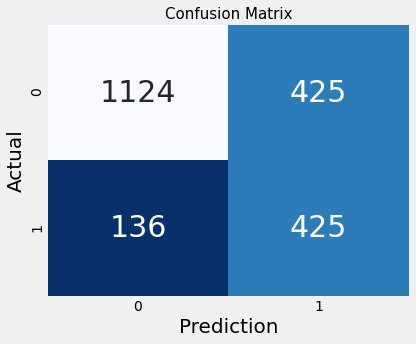

In [96]:
plt.figure(figsize = (6, 5))
sns.heatmap(
        confusion_matrix(y_test, predict_grid),
        annot = True,
        fmt = '.0f',
        cmap = 'Blues_r', cbar=False,
        annot_kws={"fontsize":30}
    )
plt.xlabel("Prediction", fontsize = 20)
plt.ylabel("Actual", fontsize = 20)
plt.title("Confusion Matrix", fontsize = 15)

plt.tight_layout()
plt.show()

Dari hasil Hyperparameter Tuning menggunakan GridSearchCV, best parameters yang didapatkan adalah {'n_hidden': 3, 'n_neurons': 30} atau 3 hidden layer dan 30 neuron pada tiap layernya.

Namun sayang sekali hasil yang didapatkan masih kurang memuaskan, walau ada kenaikan sedikit pada f1 score dan ROC_AUC. Untuk akurasi skor yang didapat masih sama di angka 0.73. Dan di confusion matrix pun juga tidak begitu banyak perubahan nilai yang berarti. Model dirasa masih belum cukup mampu memberikan hasil yang baik.

Bisa saja hal ini dikarenakan penulis hanya mengatur hidden layer dan neuron masing-masing layer saja. Jika parameter activation function dan weight initialization juga diikutkan dalam GridSearchCV, hasil yang didapatkan mungkin lebih baik.

### Model Saving

In [102]:
model_gridCV.save("my_gridcv_model.h5")

## ANN Functional

In [132]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [44]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1, activation="sigmoid")(concat)

model_func = keras.models.Model(inputs=[input_], outputs=[output])

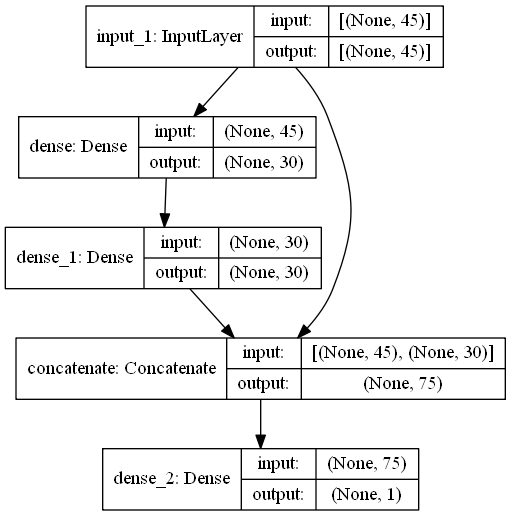

In [45]:
keras.utils.plot_model(model_func, show_shapes=True)

In [134]:
model_func.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 45)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           1380        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 75)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [135]:
model_func.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [136]:
%time history = model_func.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
159/159 [==============================] - 1s 6ms/step - loss: 0.5818 - accuracy: 0.6772 - val_loss: 0.5106 - val_accuracy: 0.7524
Epoch 2/100
159/159 [==============================] - 1s 5ms/step - loss: 0.4737 - accuracy: 0.7751 - val_loss: 0.4995 - val_accuracy: 0.7626
Epoch 3/100
159/159 [==============================] - 1s 5ms/step - loss: 0.4619 - accuracy: 0.7820 - val_loss: 0.4864 - val_accuracy: 0.7612
Epoch 4/100
159/159 [==============================] - 1s 5ms/step - loss: 0.4524 - accuracy: 0.7834 - val_loss: 0.4844 - val_accuracy: 0.7621
Epoch 5/100
159/159 [==============================] - 1s 5ms/step - loss: 0.4486 - accuracy: 0.7875 - val_loss: 0.4822 - val_accuracy: 0.7653
Epoch 6/100
159/159 [==============================] - 1s 5ms/step - loss: 0.4433 - accuracy: 0.7911 - val_loss: 0.4787 - val_accuracy: 0.7663
Epoch 7/100
159/159 [==============================] - 1s 5ms/step - loss: 0.4372 - accuracy: 0.7895 - val_loss: 0.4774 - val_accuracy: 0.7686

Epoch 58/100
159/159 [==============================] - 1s 5ms/step - loss: 0.3278 - accuracy: 0.8571 - val_loss: 0.4806 - val_accuracy: 0.7824
Epoch 59/100
159/159 [==============================] - 1s 5ms/step - loss: 0.3263 - accuracy: 0.8549 - val_loss: 0.4887 - val_accuracy: 0.7801
Epoch 60/100
159/159 [==============================] - 1s 5ms/step - loss: 0.3257 - accuracy: 0.8597 - val_loss: 0.4899 - val_accuracy: 0.7833
Epoch 61/100
159/159 [==============================] - 1s 5ms/step - loss: 0.3224 - accuracy: 0.8599 - val_loss: 0.4918 - val_accuracy: 0.7856
Epoch 62/100
159/159 [==============================] - 1s 5ms/step - loss: 0.3225 - accuracy: 0.8604 - val_loss: 0.4970 - val_accuracy: 0.7787
Epoch 63/100
159/159 [==============================] - 1s 5ms/step - loss: 0.3212 - accuracy: 0.8622 - val_loss: 0.4883 - val_accuracy: 0.7875
Epoch 64/100
159/159 [==============================] - 1s 5ms/step - loss: 0.3168 - accuracy: 0.8636 - val_loss: 0.4888 - val_accuracy:

### Plot history model functional

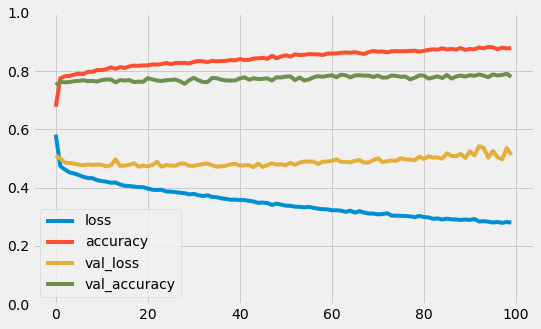

In [137]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

Dari hasil plot epoch model diatas dapat dilihat bahwa model cukup baik dalam memprediksi dataset ini. Terlihat dari semakin banyaknya epoch, semakin turun loss training setnya dan semakin naik akurasinya.

Untuk validation set sendiri juga gapnya tidak terlalu jauh untuk keduanya. Namun setelah epoch ke 50, val_loss cenderung naik dan memperbesar gap dengan nilai loss training set. Jadi epoch terbaik untuk model infrastruktur ini hanya sampai 50 saja.

In [141]:
model_func.evaluate(X_test_trf, y_test)

66/66 [==============================] - 0s 2ms/step - loss: 0.6397 - accuracy: 0.7450


[0.6396666169166565, 0.7450236678123474]

Hasil skor evaluasi yang didapatpun hanya sedikit lebih baik dari base score model ANN sequential, hanya berbeda 0.1 poin.

### Model Inference

In [147]:
pred = model_func.predict(X_test_trf)
print('Predict result: \n', pred[:5])
print('\n y_test: \n', y_test[:5])

Predict result: 
 [[0.07061094]
 [0.24558997]
 [0.00047127]
 [0.1240502 ]
 [0.0080171 ]]

 y_test: 
 4221    0
1820    0
2375    0
5462    0
1791    0
Name: Churn, dtype: int32


In [143]:
pred_funct = []
for element in pred:
    if element > 0.5:
        pred_funct.append(1)
    else:
        pred_funct.append(0)

print(pred_funct[:5])

[0, 0, 0, 0, 0]


In [144]:
#insert predict result to dataframe
pred_result_log = pd.DataFrame({
    "Actual Target":y_test,
    "Prediction":pred_funct
})
pred_result_log.head(5)

,Actual Target,Prediction
4221,0,0
1820,0,0
2375,0,0
5462,0,0
1791,0,0


### Evaluation

In [145]:
print(f"ACCURACY SCORE:\n{accuracy_score(y_test, pred_funct):.4f}")
print(f"F1 SCORE:\n{f1_score(y_test, pred_funct)}")
print(f"ROC_AUC SCORE:\n{roc_auc_score(y_test, pred_funct)}\n")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, pred_funct)}")

ACCURACY SCORE:
0.7450
F1 SCORE:
0.597305389221557
ROC_AUC SCORE:
0.7342463483427293

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.88      0.76      0.81      1549
           1       0.51      0.71      0.60       561

    accuracy                           0.75      2110
   macro avg       0.70      0.73      0.71      2110
weighted avg       0.78      0.75      0.76      2110



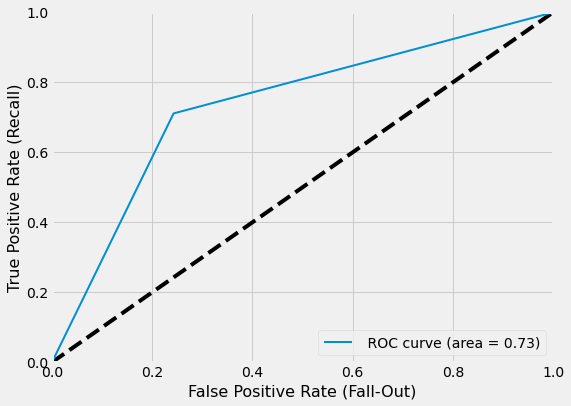

In [148]:
plt.figure(figsize=(8, 6))                                   
plt.axis([0, 1, 0, 1])                                    
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
plt.grid(True)                                            
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal

fpr, tpr, thresholds = roc_curve(y_test, pred_funct)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, linewidth=2,label=' ROC curve (area = %0.2f)' % roc_auc)

plt.legend(loc="lower right")

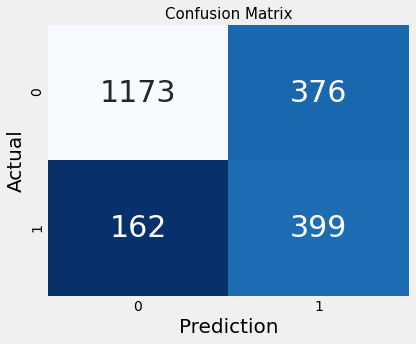

In [149]:
plt.figure(figsize = (6, 5))
sns.heatmap(
        confusion_matrix(y_test, pred_funct),
        annot = True,
        fmt = '.0f',
        cmap = 'Blues_r', cbar=False,
        annot_kws={"fontsize":30}
    )
plt.xlabel("Prediction", fontsize = 20)
plt.ylabel("Actual", fontsize = 20)
plt.title("Confusion Matrix", fontsize = 15)

plt.tight_layout()
plt.show()

Hasil evaluasi dari classification report dan confusion matrix menunjukkan hal yang sama. ANN Functional hanya **sedikit** lebih baik dari ANN Sequential. Kurang lebih hanya naik 1-2 poin saja.

### Model Improvement (Hyperparameter Tuning ANN Functional)

In [165]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [166]:
def build_model_func(optimizer, kernel, units):
    input_ = keras.layers.Input(shape=X_train.shape[1:])
    
    #Hidden Layer
    hidden1 = keras.layers.Dense(units=units, activation="relu", kernel_initializer=kernel)(input_)
    hidden2 = keras.layers.Dense(units=units, activation="relu", kernel_initializer=kernel)(hidden1)
    concat = keras.layers.concatenate([input_, hidden2])
    
    #Output Layer
    output = keras.layers.Dense(1, activation="sigmoid")(concat)
    
    model_func = keras.models.Model(inputs=[input_], outputs=[output])
    
    model_func.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model_func

In [167]:
model_best_func = keras.wrappers.scikit_learn.KerasClassifier(build_model_func)

In [168]:
parameters = {
    'optimizer':['adam','nadam'],
    'kernel':['random_uniform', 'random_normal'],
    'units':[30,40]
}

grid_cv = GridSearchCV(model_best_func, parameters, cv=5, verbose=2, n_jobs=-1)
%time grid_cv.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Epoch 1/50
159/159 [==============================] - 3s 11ms/step - loss: 0.5612 - accuracy: 0.7011 - val_loss: 0.5129 - val_accuracy: 0.7515
Epoch 2/50
159/159 [==============================] - 2s 10ms/step - loss: 0.4676 - accuracy: 0.7796 - val_loss: 0.5960 - val_accuracy: 0.7169
Epoch 3/50
159/159 [==============================] - 1s 9ms/step - loss: 0.4655 - accuracy: 0.7760 - val_loss: 0.5061 - val_accuracy: 0.7552
Epoch 4/50
159/159 [==============================] - 1s 8ms/step - loss: 0.4590 - accuracy: 0.7756 - val_loss: 0.4898 - val_accuracy: 0.7603
Epoch 5/50
159/159 [==============================] - 1s 8ms/step - loss: 0.4564 - accuracy: 0.7798 - val_loss: 0.4875 - val_accuracy: 0.7644
Epoch 6/50
159/159 [==============================] - 1s 8ms/step - loss: 0.4512 - accuracy: 0.7879 - val_loss: 0.4863 - val_accuracy: 0.7626
Epoch 7/50
159/159 [==============================] - 1s 8ms/step - loss: 0.4491 - acc

GridSearchCV(cv=5,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001E5DEBBB220>,
             n_jobs=-1,
             param_grid={'kernel': ['random_uniform', 'random_normal'],
                         'optimizer': ['adam', 'nadam'], 'units': [30, 40]},
             verbose=2)

In [169]:
print('Grid Search Best score', grid_cv.best_score_)
print('Grid Search Best Parameters', grid_cv.best_params_)

Grid Search Best score 0.7956119060516358
Grid Search Best Parameters {'kernel': 'random_normal', 'optimizer': 'nadam', 'units': 40}


In [173]:
grid_cv.score(X_test_trf, y_test)

66/66 [==============================] - 0s 3ms/step - loss: 0.5003 - accuracy: 0.7536


0.7535545229911804

In [171]:
grid_cv.best_estimator_

In [174]:
# Hasil evaluasi model dari gridCV
model_func_gridCV = grid_cv.best_estimator_.model

model_func_gridCV.evaluate(X_test_trf, y_test)

66/66 [==============================] - 0s 2ms/step - loss: 0.5003 - accuracy: 0.7536


[0.5002994537353516, 0.7535545229911804]

### Model Inference (Hasil GridSearchCV)

In [175]:
pred_grid = model_func_gridCV.predict(X_test_trf)
print('Predict result: \n', pred_grid[:5])
print('\n y_test: \n', y_test[:5])

predict_grid = []
for element in pred_grid:
    if element > 0.5:
        predict_grid.append(1)
    else:
        predict_grid.append(0)

print('\n',predict_grid[:5])

Predict result: 
 [[0.3913301 ]
 [0.7114008 ]
 [0.03306402]
 [0.07087358]
 [0.04242516]]

 y_test: 
 4221    0
1820    0
2375    0
5462    0
1791    0
Name: Churn, dtype: int32

 [0, 1, 0, 0, 0]


### Evaluation (Hasil GridSearchCV)

In [176]:
print(f"ACCURACY SCORE:\n{accuracy_score(y_test, predict_grid):.4f}")
print(f"F1 SCORE:\n{f1_score(y_test, predict_grid)}")
print(f"ROC_AUC SCORE:\n{roc_auc_score(y_test, predict_grid)}\n")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, predict_grid)}")

ACCURACY SCORE:
0.7536
F1 SCORE:
0.6119402985074627
ROC_AUC SCORE:
0.7463097921837907

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1549
           1       0.53      0.73      0.61       561

    accuracy                           0.75      2110
   macro avg       0.71      0.75      0.72      2110
weighted avg       0.79      0.75      0.76      2110



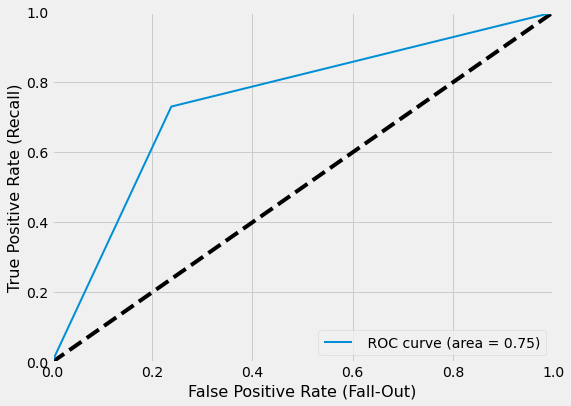

In [177]:
plt.figure(figsize=(8, 6))                                   
plt.axis([0, 1, 0, 1])                                    
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
plt.grid(True)                                            
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal

fpr, tpr, thresholds = roc_curve(y_test, predict_grid)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, linewidth=2,label=' ROC curve (area = %0.2f)' % roc_auc)

plt.legend(loc="lower right")

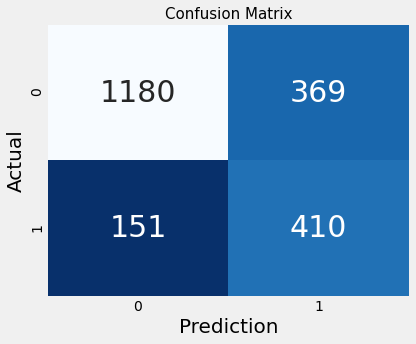

In [178]:
plt.figure(figsize = (6, 5))
sns.heatmap(
        confusion_matrix(y_test, predict_grid),
        annot = True,
        fmt = '.0f',
        cmap = 'Blues_r', cbar=False,
        annot_kws={"fontsize":30}
    )
plt.xlabel("Prediction", fontsize = 20)
plt.ylabel("Actual", fontsize = 20)
plt.title("Confusion Matrix", fontsize = 15)

plt.tight_layout()
plt.show()

Setelah dilakukan pencarian best parameter, best parameter yang didapat adalah:
- kernel_initializer = 'random_normal'
- optimizer = 'nadam'
- units (neuron) = 40

Nilai skor yang didapat (Classification report dan ROC_AUC score) naik sekitar 1-2 poin dari hasil *base model* sebelumnya. Dari confusion matrix, f1 score hanya naik 1 poin. Namun perbedaan nilai pada False Positive dan Negative nya cukup besar yakni 10 poin. Walau sebenernya ini belum cukup rendah, karena nilai False Positive masih dekat dengan nilai True Positive.

### Model Saving

In [179]:
model_func_gridCV.save("my_gridcv_model_ANNfunc.h5")

# Conclusion

## Insights from EDA
- Dari hasil slicing data, rata-rata customer kategori tersebut adalah masyarakat non-senior (dengan asumsi dibawah 40 tahun), sayangnyaumur tidak disebutkan di sini. Service yang digunakan kebanyakan hanya Phone, Internet service dan Streaming TV and movies dengan metode pembayaran elektronik.

- Berdasarkan hal-hal di atas dapat diasumsikan bahwa customer kategori ini adalah customer yang hanya ingin coba-coba layanan saja dari perusahaan Telco ini, mayoritas pemakaian pun kebanyakan hanya 1 bulan saja, dengan mengambil jangka waktu langganan perbulan (month-to-month).

## Model Analysis
### ANN Sequential
- Dari 50x epoch base model, dapat terlihat bahwa akurasi training set model semakin naik seiring berjalannya epoch. Akurasi dari validation set pun juga semakin naik seiring waktu walaupun tidak begitu sama persis dengan training set. Untuk loss training set sendiri semakin turun seiring berjalannya waktu, sementara loss validation set juga ikut turun namun sedikit demi sedikit dan terlihat tidak begitu signifikan dibandingkan dengan training set. Kemungkinan jika epoch ditambah, kemungkinan gap yang ada semakin bertambah. Namun dari Base model ini, dirasa sudah cukup baik karena gap kedua set ini (baik loss dan akurasi) tidak begitu jauh. Dari hasil Classification Report, nilai akurasi yang didapat adalah 0.73 dan ROC_AUC score = 0.72, nilai ini dirasa cukup bagus untuk base score. Namun jika dilihat dari Confusion Matrix dan precision recallnya terhadap 1 (Churn = "Yes"), hasil yang didapat tidak bagus. Nilai F1 scorenya pun begitu rendah. Model hanya mampu memprediksi customer yang tetap berlangganan saja.

- Dari hasil Hyperparameter Tuning menggunakan GridSearchCV, best parameters yang didapatkan adalah {'n_hidden': 3, 'n_neurons': 30} atau 3 hidden layer dan 30 neuron pada tiap layernya. Namun sayang sekali hasil yang didapatkan masih kurang memuaskan, walau ada kenaikan sedikit pada f1 score dan ROC_AUC. Model dirasa masih belum cukup mampu memberikan hasil yang baik. Mungkin dikarenakan parameter yang diatur pada GridSearchCV hanya mengatur hidden layer dan neuron masing-masing layer saja. Jika parameter activation function dan weight initialization juga diikutkan dalam GridSearchCV, hasil yang didapat mungkin akan lebih baik.

### ANN Functional
- Dari hasil plot epoch model diatas dapat dilihat bahwa model cukup baik dalam memprediksi dataset ini. Terlihat dari semakin banyaknya epoch, semakin turun loss training setnya dan semakin naik akurasinya. Untuk validation set sendiri juga gapnya tidak terlalu jauh untuk keduanya. Namun setelah epoch ke 50, val_loss cenderung naik dan memperbesar gap dengan nilai loss training set.
- Hasil evaluasi dari classification report dan confusion matrix menunjukkan hal yang sama. ANN Functional hanya sedikit lebih baik dari ANN Sequential. Kurang lebih hanya naik 1-2 poin saja.

- Setelah dilakukan pencarian best parameter, best parameter yang didapat adalah:
    1. kernel_initializer = 'random_normal'
    2. optimizer = 'nadam'
    3. units (neuron) = 40
    
- Nilai skor yang didapat dari GridSearchCV (Classification report dan ROC_AUC score) naik sekitar 1-2 poin dari hasil base model sebelumnya. Dari confusion matrix, f1 score hanya naik 1 poin. Namun perbedaan nilai pada False Positive dan Negative nya cukup besar yakni 10 poin. Walau sebenernya ini belum cukup rendah, karena nilai False Positive masih dekat dengan nilai True Positive.

Hasil skor base model ANN Functional sedikit lebih baik dari ANN Sequential. Kedua model ini dapat skor yang lebih baik lagi jika GridSearchCV yang dilakukan lebih lengkap lagi parameternya namun harus mengorbankan waktu dan komputasi yang besar pula.

Kesimpulan dari keseluruhan model yang dibuat adalah Model dirasa belum mampu memprediksi apakah customer akan churn (berhenti berlangganan) atau tidak. Disini penulis mengharapkan keseimbangan yang rendah antara False Poitive dan False Positive (nilai F1 Score yang tinggi), dengan alasan agar perusahaan bisa berfokus pada pelanggan yang benar-benar terindikasi akan berhenti berlangganan (churning), dan tidak menghabiskan cost pada target yang salah. Atau bisa juga fokus pada False Negative yang rendah, dengan pertimbangan bahwa cost False Positive lebih rendah daripada cost False negative.